### **Write a Python function (def) that builds and trains the model, and outputs the final predictions and losses.**

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [14]:
def ANNreg(x, y, epochs=500, lr=0.05, seed=42):
    torch.manual_seed(seed)

    # Model
    model = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
    )

    # Loss and optimizer
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Store losses
    losses = torch.zeros(epochs)

    # Training loop
    for epoch in range(epochs):
        y_hat = model(x)
        loss = lossfun(y_hat, y)
        losses[epoch] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = model(x).detach()

    return predictions, losses


In [4]:
def create_data(m, N=50, seed=42):
    torch.manual_seed(seed)

    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2

    return x, y

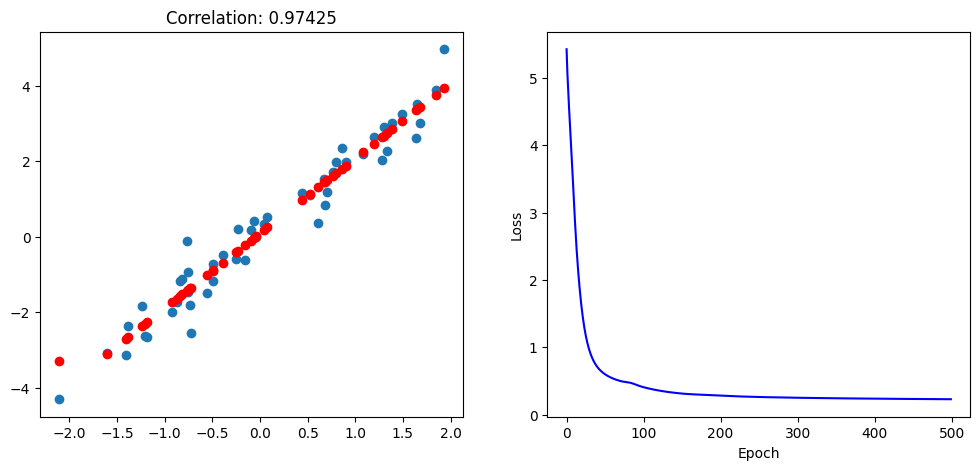

In [15]:
x,y = create_data(2)
predictions,losses = ANNreg(x,y)

plt.figure(figsize=(12,5))

correlation = np.corrcoef(y.T, predictions.detach().numpy().T)[0,1]

plt.subplot(1,2,1)
plt.scatter(x,y)
plt.plot(x, predictions.detach().numpy(), 'ro')
plt.title(f'Correlation: {correlation:.5f}')

plt.subplot(1,2,2)
plt.plot(losses, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
slopes = np.linspace(-2, 2, 21)
repeats = 50

all_losses = np.zeros((repeats, len(slopes)))
all_corrs = np.zeros((repeats, len(slopes)))

for r in range(repeats):
    for i, m in enumerate(slopes):
        x, y = create_data(m)
        y_hat, losses = ANNreg(x, y)

        all_losses[r, i] = losses[-1].item()

        corr = np.corrcoef(y.T.numpy(), y_hat.T.numpy())[0, 1]
        all_corrs[r, i] = corr


**Structure of losses are stored in a table**

| Run ↓/ losses → | -2   | -1.8 | ... | 0     | ... | +2    |
| --------------- | ---- | ---- | --- | ----- | --- | ----- |
| Run 0           | L₀₀  | L₀₁  | ... | L₀₁₀  | ... | L₀₂₀  |
| Run 1           | L₁₀  | L₁₁  | ... | L₁₁₀  | ... | L₁₂₀  |
| ...             | ...  | ...  | ... | ...   | ... | ...   |
| Run 49          | L₄₉₀ | L₄₉₁ | ... | L₄₉₁₀ | ... | L₄₉₂₀ |


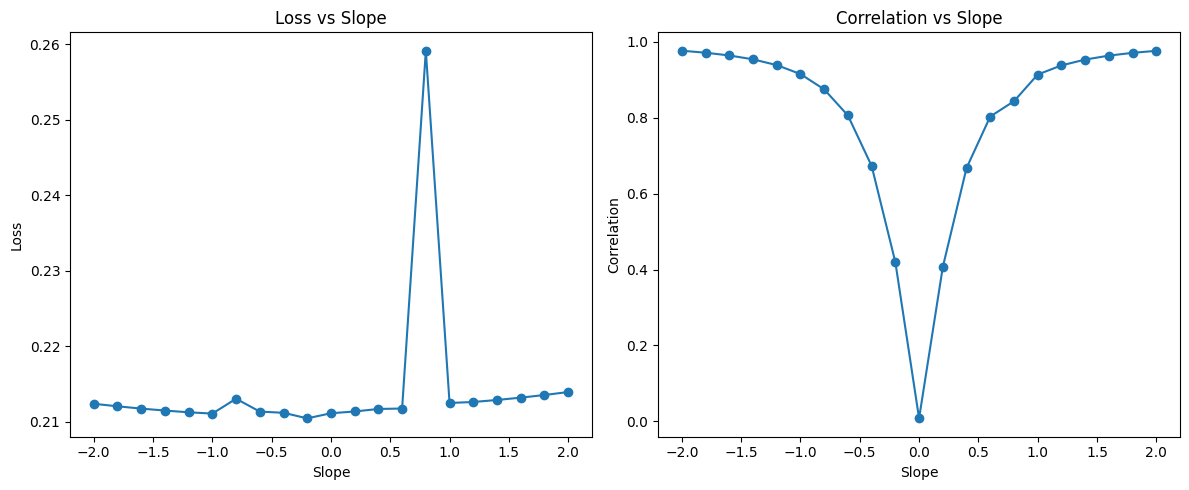

In [34]:
mean_loss = all_losses.mean(axis=0)
mean_corr = all_corrs.mean(axis=0)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(slopes, mean_loss, 'o-')
plt.xlabel('Slope')
plt.ylabel('Loss')
plt.title('Loss vs Slope')

plt.subplot(1,2,2)
plt.plot(slopes, mean_corr, 'o-')
plt.xlabel('Slope')
plt.ylabel('Correlation')
plt.title('Correlation vs Slope')

plt.tight_layout()
plt.show()
